In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numba
from matplotlib import animation
import scienceplots
plt.style.use(['science','ieee'])

In [2]:
N=1000

In [3]:
init_random=np.random.random((N,N))
lattice_Ne=np.ones((N,N))

In [4]:
lattice_Ne[init_random<=0.5]=-1


In [5]:
@numba.njit("(f8[:,:], i8, f8)", nogil=True)
def metropolis(spin_arr, times, T):
    spin_arr = spin_arr.copy()
    
    for t in range(0, times-1):
        x = np.random.randint(0, N)
        y = np.random.randint(0, N)
        spin_i = spin_arr[x, y] 
        spin_f = spin_i * -1
        E_i = -spin_i * (spin_arr[(x-1) % N, y] + spin_arr[(x+1) % N, y] + spin_arr[x, (y-1) % N] + spin_arr[x, (y+1) % N])
        E_f = -E_i
        dE = E_f - E_i
        if (dE > 0) * (np.random.random() < np.exp(-1/T * dE)):
            spin_arr[x, y] = spin_f
        elif dE <= 0:
            spin_arr[x, y] = spin_f
            
    return spin_arr


0
0
0


KeyboardInterrupt: 

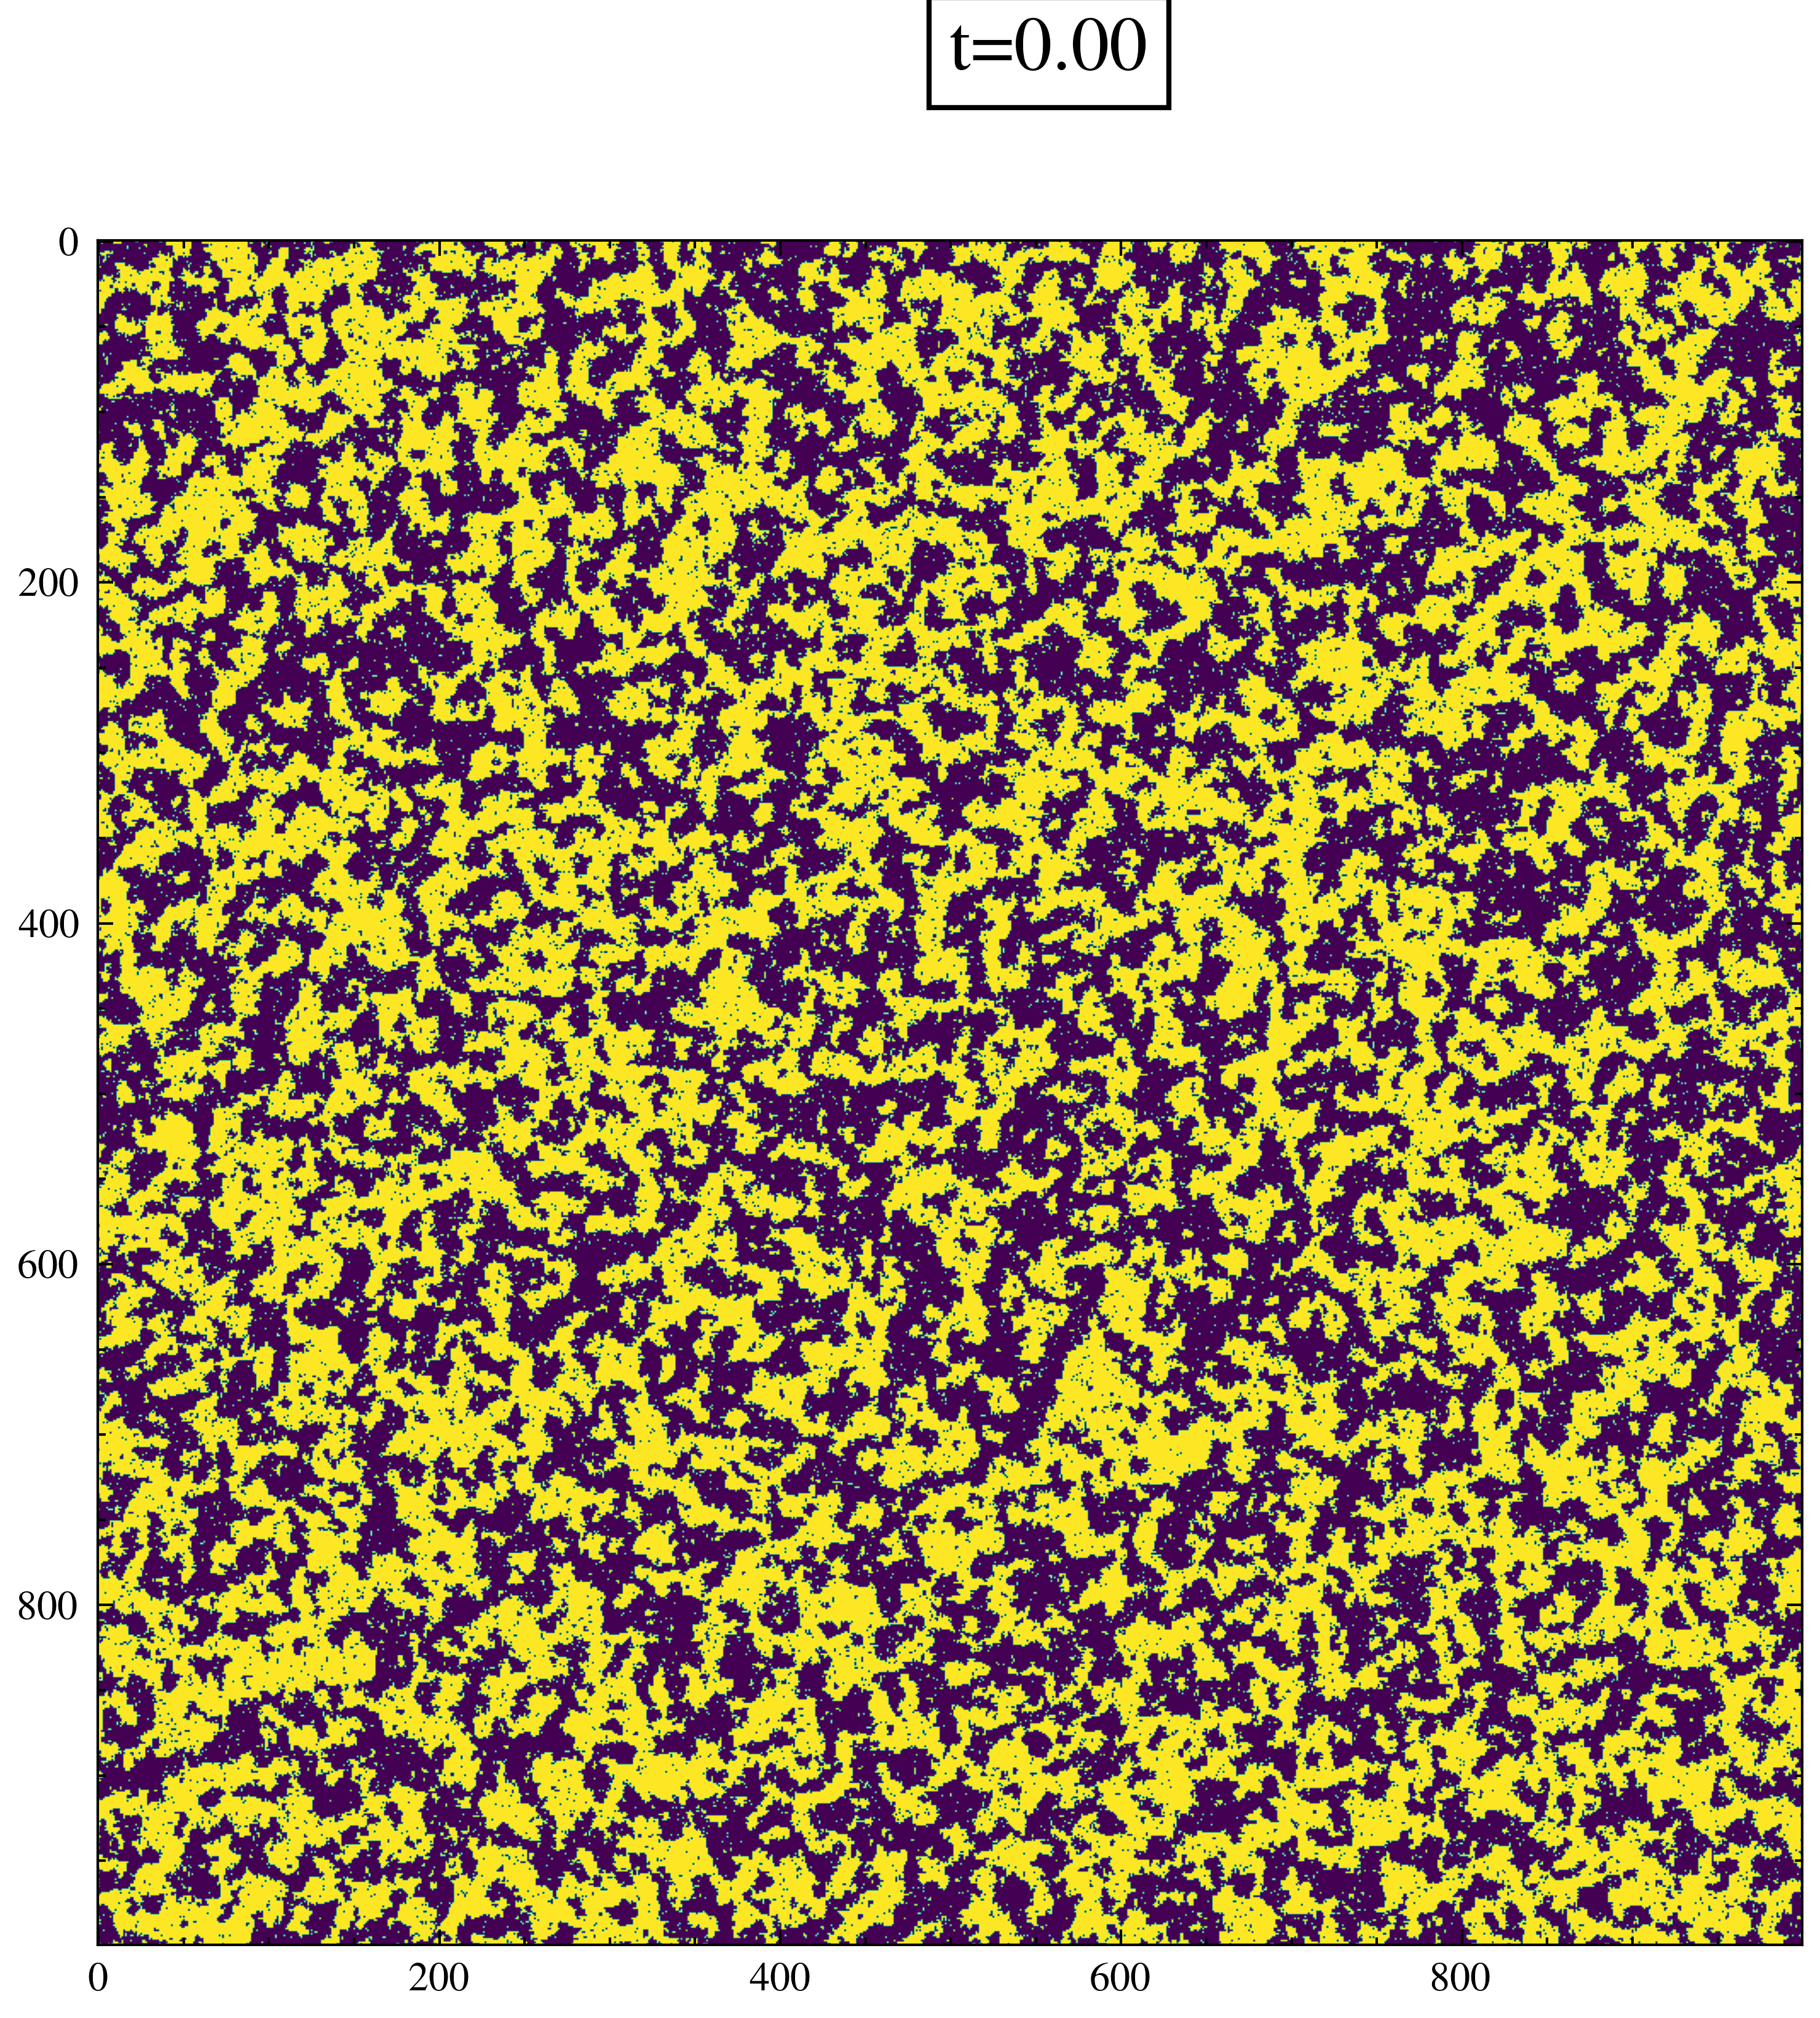

In [6]:

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ln1 = plt.imshow(lattice_Ne, cmap='viridis', animated=True)
time_text = ax.text(0.5, 1.1, '', fontsize=15, transform=ax.transAxes, bbox=dict(facecolor='white', edgecolor='black'))


def update(i):
    global lattice_Ne
    lattice_Ne = metropolis(lattice_Ne, 10000000, 2.269-0.3)
    ln1.set_array(lattice_Ne)
    time_text.set_text('t={:.2f}'.format(i))
    #print(i)
    return ln1, time_text

ani = animation.FuncAnimation(fig, update, frames=range(1000), interval=10, blit=True)
ani.save('ising_evolution4.gif', writer='pillow', fps=30, dpi=100)

plt.show()
